<a href="https://colab.research.google.com/github/abbarcenasj/unifying-data-science-final-project-pandemics-unemployment/blob/master/COVID_Unemployment_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-final-project-pandemics-unemployment/master/data/unemployment_2016_2020.csv'
unemployment = pd.read_csv(url)
unemployment.head()

,state,filed_week_ended,initial_claims,reflecting_week_ended,continued_claims,covered_employment,insured_unemployment_rate
0,Alabama,1/2/16,"6,574",12/26/15,"26,579","1,816,714",1.46
1,Alabama,1/9/16,"8,151",1/2/16,"31,509","1,823,207",1.73
2,Alabama,1/16/16,"4,737",1/9/16,"25,695","1,823,207",1.41
3,Alabama,1/23/16,"3,226",1/16/16,"23,845","1,823,207",1.31
4,Alabama,1/30/16,"3,392",1/23/16,"24,259","1,823,207",1.33


In [0]:
url = 'https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-final-project-pandemics-unemployment/master/data/effective_dates.csv'
order_date = pd.read_csv(url)
order_date.head()

,state,effective_date,order_in_place
0,Alabama,2020-04-04,1
1,Alaska,2020-03-28,1
2,Arizona,2020-03-31,1
3,Arkansas,NaN,0
4,California,2020-03-19,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11821 entries, 0 to 11820
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      11820 non-null  object 
 1   Filed week ended           11819 non-null  object 
 2   Initial Claims             11819 non-null  float64
 3   Reflecting Week Ended      11819 non-null  object 
 4   Continued Claims           11819 non-null  float64
 5   Covered Employment         11819 non-null  float64
 6   Insured Unemployment Rate  11819 non-null  float64
dtypes: float64(4), object(3)
memory usage: 646.6+ KB
New York
Initial Claims
New York
Initial Claims
2020-03-22 00:00:00


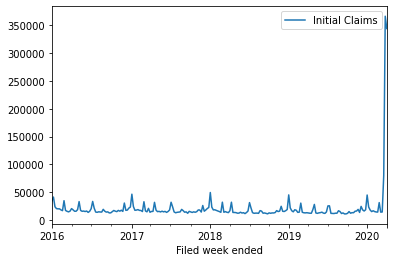

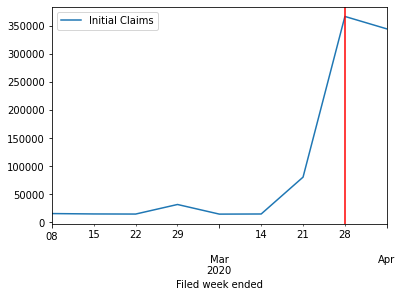

In [0]:
# Jose's steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plot images
import datetime #convert str to datetime


#Download data from git repository
unemployment_rates_url = 'https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-final-project-pandemics-unemployment/master/data/unemployment_2016_2020.csv'
unemployment_rates_data = pd.read_csv(unemployment_rates_url, thousands = ',')

state_demographics_url = 'https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-final-project-pandemics-unemployment/master/data/states_demographics.csv'
state_demographic_data = pd.read_csv(state_demographics_url)

#Ana already merged this data in the demographics dataset
#state_home_file = 'C:/Duke University/2nd Term/Practical DS 690-2/Final Project/stayhomeorders_sources.xlsx'
#state_home_data = pd.read_excel(state_home_file, index_col=None, usecols = ['State', 'Order Date'])

#Check the data types and look for empty values NA's
unemployment_rates_data.info()

#Locate empty values in the last two rows of the dataset.
unemployment_rates_data.tail()
state_demographic_data.head()

#Drop the last 2 rows with NA values.
unemployment_rates_data = unemployment_rates_data[:-2] 
unemployment_rates_data.tail()

#Convert Filed week ended and Reflecting Week Ended into date time format.
unemployment_rates_data['Filed week ended'] = pd.to_datetime(unemployment_rates_data['Filed week ended'])
unemployment_rates_data['Reflecting Week Ended'] = pd.to_datetime(unemployment_rates_data['Reflecting Week Ended'])
unemployment_rates_data.head()

#Convert effective_date into date time format.
state_demographic_data['effective_date'] = pd.to_datetime(state_demographic_data['effective_date'])

#Plot by State and set the metric to plot [Initial Claims|Continued Claims|Insured Unemployment Rate]
state = 'Texas' #input()
metric = 'Initial Claims' #input()
unemployment_by_state = unemployment_rates_data[unemployment_rates_data.State == state]
unemployment_by_state.plot(kind = 'line', x = 'Filed week ended', y = metric)

#Set the state and metric to plot
state = 'Texas' #input()
metric = 'Initial Claims' #input()

locator = mdates.AutoDateLocator(minticks=12)
formatter = mdates.ConciseDateFormatter(locator)

# Subset the last 8 weeks, since February first and plot a vertical line at the date the stay_home_orders were 
# effective. Metrics [Initial Claims|Continued Claims|Insured Unemployment Rate]
unemployment_rates_subset = unemployment_rates_data[unemployment_rates_data['Filed week ended'] > '2020-02-01']
unemployment_by_state = unemployment_rates_subset[unemployment_rates_subset.State == state]

date = unemployment_by_state['Filed week ended']
fig, ax = plt.subplots()
ax.plot(date, unemployment_by_state[metric])

#Include a vertical line for the date the state home orders were put in place.
date1 = state_demographic_data['effective_date'][state_demographic_data.State == state].item()
print(date1)
ax.axvline(date1, color = 'r')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.ylabel(metric)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.show()